In [3]:
import pandas as pd 
import numpy as np

In [4]:
environnement_normees = pd.read_csv('../preprocessing/donnees_environnement_capteurs.csv', sep=';')

index = environnement_normees['Capteurs']
colonnes = environnement_normees.columns
environnement_normees = environnement_normees.drop(environnement_normees.columns[0], axis=1)

In [5]:
environnement_normees.corr()

,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
Typologie_zone,1.000000,-0.220877,0.248868,0.370505,0.052886,-0.047574,0.069767,-0.347928,0.207387,-0.201783,0.173556,-0.209963,-0.235349,-0.225360,0.053727,-0.101846
Type_voie,-0.220877,1.000000,-0.123736,-0.197064,0.231297,0.123229,0.145318,0.252474,-0.029009,0.120798,-0.027930,0.126842,0.152644,0.129805,0.071804,0.039661
Nombre_voies,0.248868,-0.123736,1.000000,0.192088,0.148088,-0.147471,-0.003752,-0.195107,0.137270,-0.118138,0.256226,-0.728442,-0.700993,-0.731524,-0.307444,-0.488624
Distance_capteur_voie,0.370505,-0.197064,0.192088,1.000000,-0.147529,-0.382069,-0.302956,-0.234479,0.101660,-0.123446,0.016604,-0.293408,-0.227236,-0.297856,0.137896,-0.048350
Position_capteurs,0.052886,0.231297,0.148088,-0.147529,1.000000,0.308228,0.280040,-0.073903,0.172549,-0.034501,0.166979,-0.243835,-0.155039,-0.238002,-0.178201,-0.227337
Presence_arbres,-0.047574,0.123229,-0.147471,-0.382069,0.308228,1.000000,0.747910,0.169085,-0.012202,0.267400,0.049689,0.075030,0.064935,0.078650,-0.312424,-0.194273
Feuille_arbres,0.069767,0.145318,-0.003752,-0.302956,0.280040,0.747910,1.000000,0.126073,0.021321,0.198364,0.024348,-0.111425,-0.135904,-0.112689,-0.371634,-0.336961
Morphologie_urbaine,-0.347928,0.252474,-0.195107,-0.234479,-0.073903,0.169085,0.126073,1.000000,-0.556931,0.557476,-0.276683,-0.016390,0.010322,-0.010161,-0.307084,-0.216647
Hauteur_batiments,0.207387,-0.029009,0.137270,0.101660,0.172549,-0.012202,0.021321,-0.556931,1.000000,-0.194532,0.134608,-0.116751,-0.115277,-0.123036,0.270166,0.032952
Distance_capteur_batiment,-0.201783,0.120798,-0.118138,-0.123446,-0.034501,0.267400,0.198364,0.557476,-0.194532,1.000000,-0.239988,-0.091284,0.036386,-0.081452,-0.293546,-0.191614


In [6]:
Y_tsne = environnement_normees.to_numpy()
Y_acp = environnement_normees.to_numpy()

## Début ACP

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [8]:
pca = PCA(n_components=16)
pca.fit(Y_acp)

print(pca.explained_variance_ratio_)
print(pca.get_covariance())

[2.79206849e-01 1.89389469e-01 1.21158054e-01 7.31152966e-02
 6.53207906e-02 5.24010400e-02 4.30007014e-02 3.93055934e-02
 3.13411286e-02 3.09254262e-02 2.33899708e-02 1.81245351e-02
 1.43619639e-02 1.14167913e-02 7.50622980e-03 3.61605720e-05]
[[ 1.01041667 -0.22317808  0.25146054  0.37436407  0.05343735 -0.04806906
   0.07049364 -0.35155207  0.20954739 -0.20388511  0.17536383 -0.21215008
  -0.23780072 -0.22770753  0.05428619 -0.10290664]
 [-0.22317808  1.01041667 -0.12502507 -0.19911656  0.2337066   0.12451252
   0.14683194  0.25510389 -0.02931113  0.12205639 -0.02822133  0.12816277
   0.15423437  0.13115706  0.07255147  0.04007379]
 [ 0.25146054 -0.12502507  1.01041667  0.19408912  0.14963033 -0.14900757
  -0.0037911  -0.19713934  0.13869946 -0.11936857  0.25889511 -0.73602965
  -0.70829469 -0.73914418 -0.31064651 -0.49371333]
 [ 0.37436407 -0.19911656  0.19408912  1.01041667 -0.14906576 -0.38604848
  -0.30611167 -0.23692142  0.10271917 -0.12473214  0.01677707 -0.296464
  -0.2296035

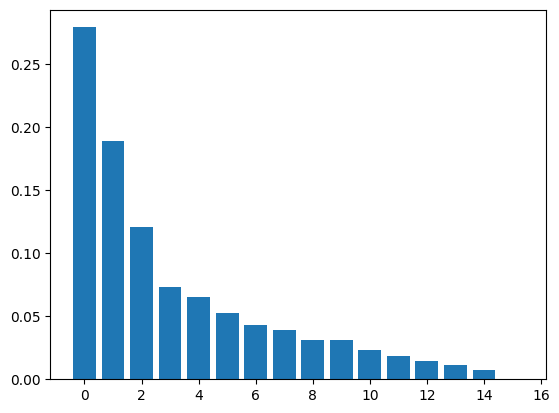

In [9]:
x = np.arange(0, 16, 1)
y = pca.explained_variance_ratio_
plt.bar(x, y)
plt.show()

In [10]:
print(np.cumsum(pca.explained_variance_ratio_))
print("====")
print(pca.explained_variance_ratio_)

[0.27920685 0.46859632 0.58975437 0.66286967 0.72819046 0.7805915
 0.8235922  0.86289779 0.89423892 0.92516435 0.94855432 0.96667885
 0.98104082 0.99245761 0.99996384 1.        ]
====
[2.79206849e-01 1.89389469e-01 1.21158054e-01 7.31152966e-02
 6.53207906e-02 5.24010400e-02 4.30007014e-02 3.93055934e-02
 3.13411286e-02 3.09254262e-02 2.33899708e-02 1.81245351e-02
 1.43619639e-02 1.14167913e-02 7.50622980e-03 3.61605720e-05]


**Part d'inertie** : choisit le nombre d'axe de façon à conserver une certaine part de l'inertie total, cela revient à fixer un seuil de qualité global

**Regle de Kaiser** : On retient que les axes associés aux valeurs propres considérées comme les plus "informatives", donc supérieures à leurs mopyennes I/p

**Eboulis des valeurs propres** : On trace un graphe représentant la décroissance des valeurs propres et on cherche un coude dans le graphe. On retient les axes associées aux valeurs propres situées avant le coude. 

5, 4, 3, 

## ACP sur uniquement 4 composant 

In [11]:
pca = PCA(n_components=4)
Z_acp = pca.fit_transform(Y_acp)



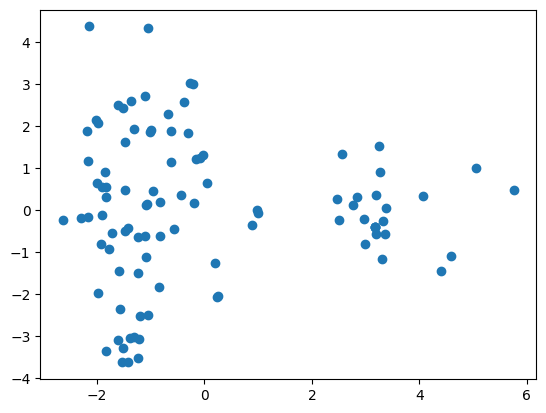

In [12]:
x = Z_acp[:,0]
y = Z_acp[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

In [13]:
tsne = TSNE(n_components=2, random_state=42)
Z_tsne = tsne.fit_transform(Z_acp)


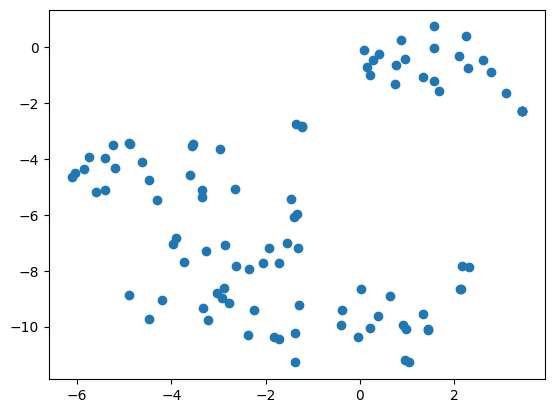

In [14]:
x = Z_tsne[:,0]
y = Z_tsne[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

In [15]:
matrice = np.triu(environnement_normees.corr(), k=1)

In [16]:


# Récupérer les indices des valeurs les plus corrélées positivement
indices_corr_positives = np.where((matrice > 0.8) & (matrice < 1))

# Récupérer les indices des valeurs les plus corrélées négativement
indices_corr_negatives = np.where((matrice < -0.73) & (matrice > -1))


In [17]:
indices_corr_positives

(array([11, 11, 12], dtype=int64), array([12, 13, 13], dtype=int64))

In [19]:

indices_moins_corr = np.where((np.abs(matrice) > 0) & (np.abs(matrice) < 0.01))


In [20]:
indices_moins_corr

(array([2], dtype=int64), array([6], dtype=int64))

## Correlation 

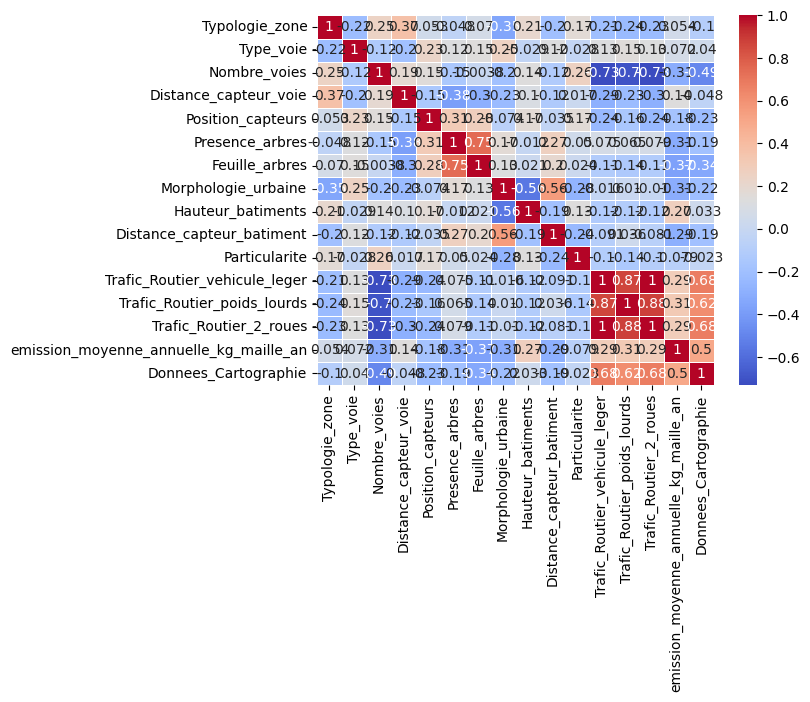

In [22]:
import seaborn as sns 

sns.heatmap(environnement_normees.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [23]:
valeurs_propres = pca.explained_variance_ #valeurs propres                                       
vecteurs_propres = pca.components_ #vecteurs propres 

correlations = np.zeros((pca.n_components_, len(colonnes)-1))
for i in range(pca.n_components_):
    for y in range(len(colonnes)-1): # car on a garder index
        correlations[i,y] = np.sqrt(valeurs_propres[i]) * vecteurs_propres[i, y]

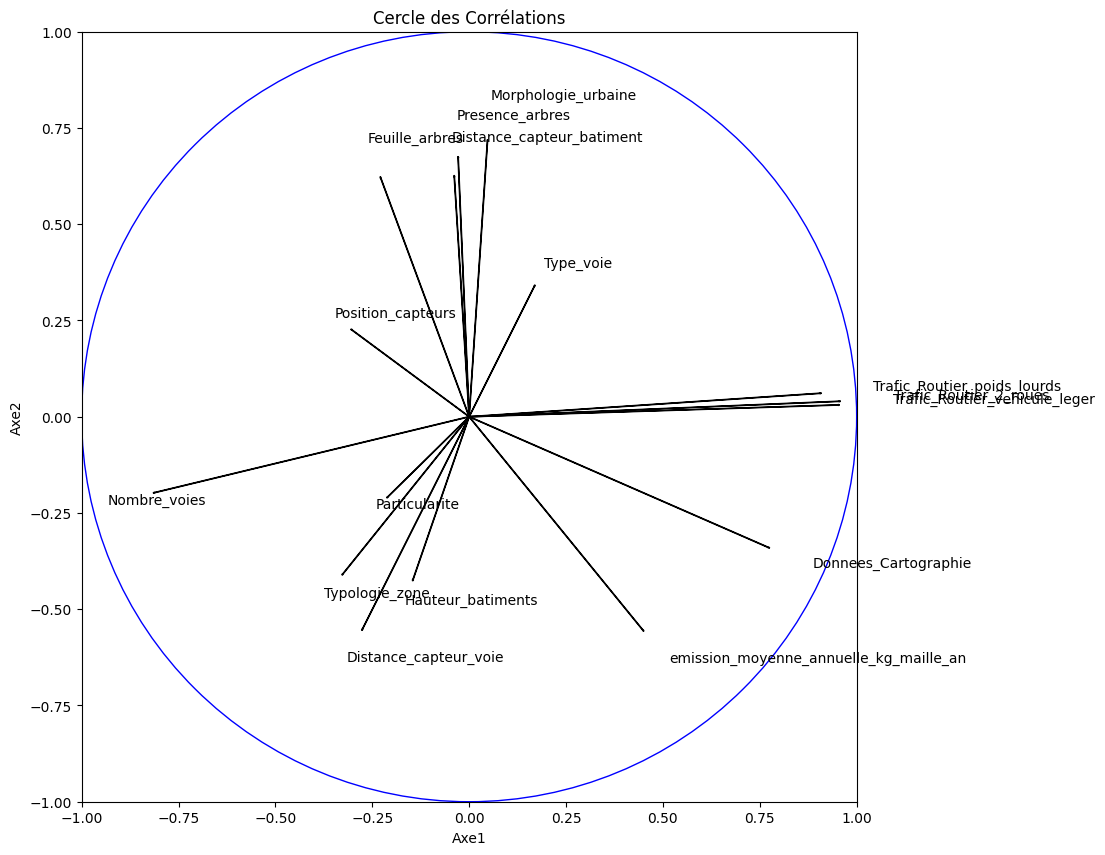

In [24]:
# Créez une figure 
plt.figure(figsize=(10, 10))

# Tracez le cercle des corrélations 
circle = plt.Circle((0, 0), 1, fill=False, color='b') 
plt.gca().add_artist(circle) 

# Tracez les variables projetées sur le plan factoriel 
for i in range(len(correlations[0])): 
    plt.arrow(0, 0, correlations[0, i], correlations[1, i]) 
    plt.text(correlations[0, i] * 1.15, correlations[1, i] * 1.15, f"{colonnes[i+1]}")

# Ajout des labels des axes x et y
plt.xlabel('Axe1')
plt.ylabel('Axe2')
plt.title('Cercle des Corrélations')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()
plt.show()

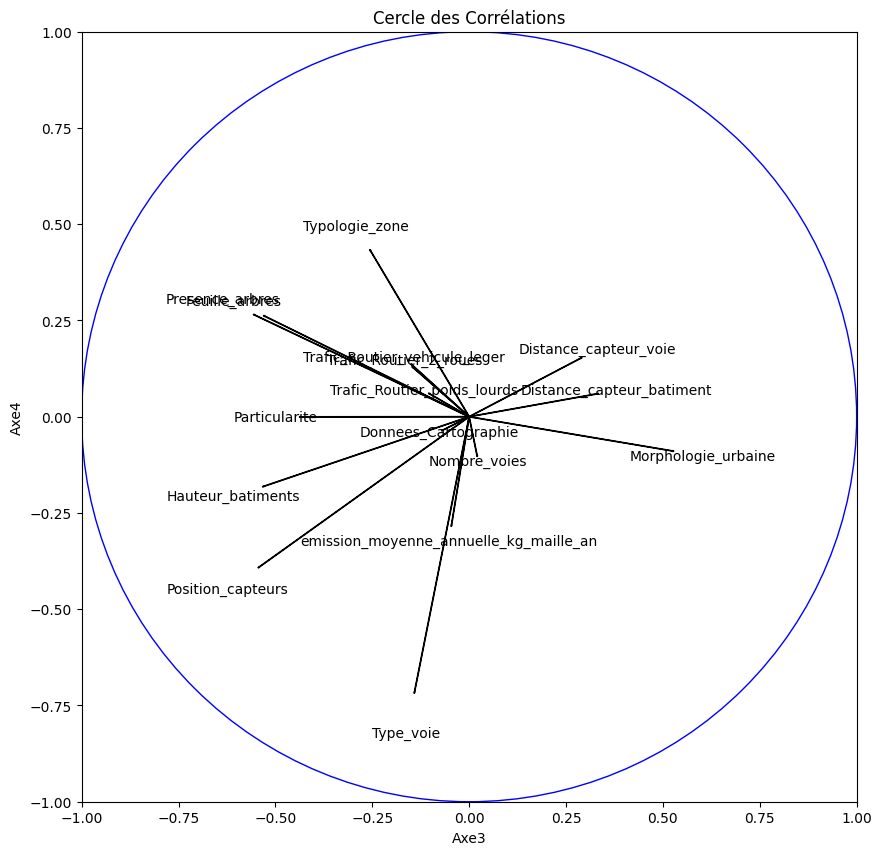

In [25]:
# Créez une figure 
plt.figure(figsize=(10, 10))

# Tracez le cercle des corrélations 
circle = plt.Circle((0, 0), 1, fill=False, color='b') 
plt.gca().add_artist(circle) 

# Tracez les variables projetées sur le plan factoriel 
for i in range(len(correlations[0])): 
    plt.arrow(0, 0, correlations[2, i], correlations[3, i]) 
    plt.text(correlations[2, i] * 1.15, correlations[3, i] * 1.15, f"{colonnes[i+1]}", ha='center', va='center')

# Ajout des labels des axes x et y
plt.xlabel('Axe3')
plt.ylabel('Axe4')
plt.title('Cercle des Corrélations')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [26]:
correlations

array([[-3.25681448e-01,  1.68144172e-01, -8.11470527e-01,
        -2.75271472e-01, -3.02121732e-01, -2.83388344e-02,
        -2.28050561e-01,  4.72848533e-02, -1.44760981e-01,
        -3.82930182e-02, -2.09833099e-01,  9.51608985e-01,
         9.05129828e-01,  9.54494119e-01,  4.48193854e-01,
         7.71824072e-01],
       [-4.08094638e-01,  3.38567332e-01, -1.97062549e-01,
        -5.51398370e-01,  2.25108924e-01,  6.72160268e-01,
         6.19704248e-01,  7.16158102e-01, -4.22665475e-01,
         6.22942053e-01, -2.08028570e-01,  3.05148661e-02,
         6.08134661e-02,  4.00044230e-02, -5.54060319e-01,
        -3.39371298e-01],
       [-2.54381648e-01, -1.40937353e-01,  2.02554191e-02,
         2.87858568e-01, -5.41540128e-01, -5.53428273e-01,
        -5.27452975e-01,  5.24495864e-01, -5.29754585e-01,
         3.30316700e-01, -4.34305019e-01, -1.47462900e-01,
        -1.01567936e-01, -1.44701372e-01, -4.55430498e-02,
        -6.76805753e-02],
       [ 4.30763036e-01, -7.14697543e

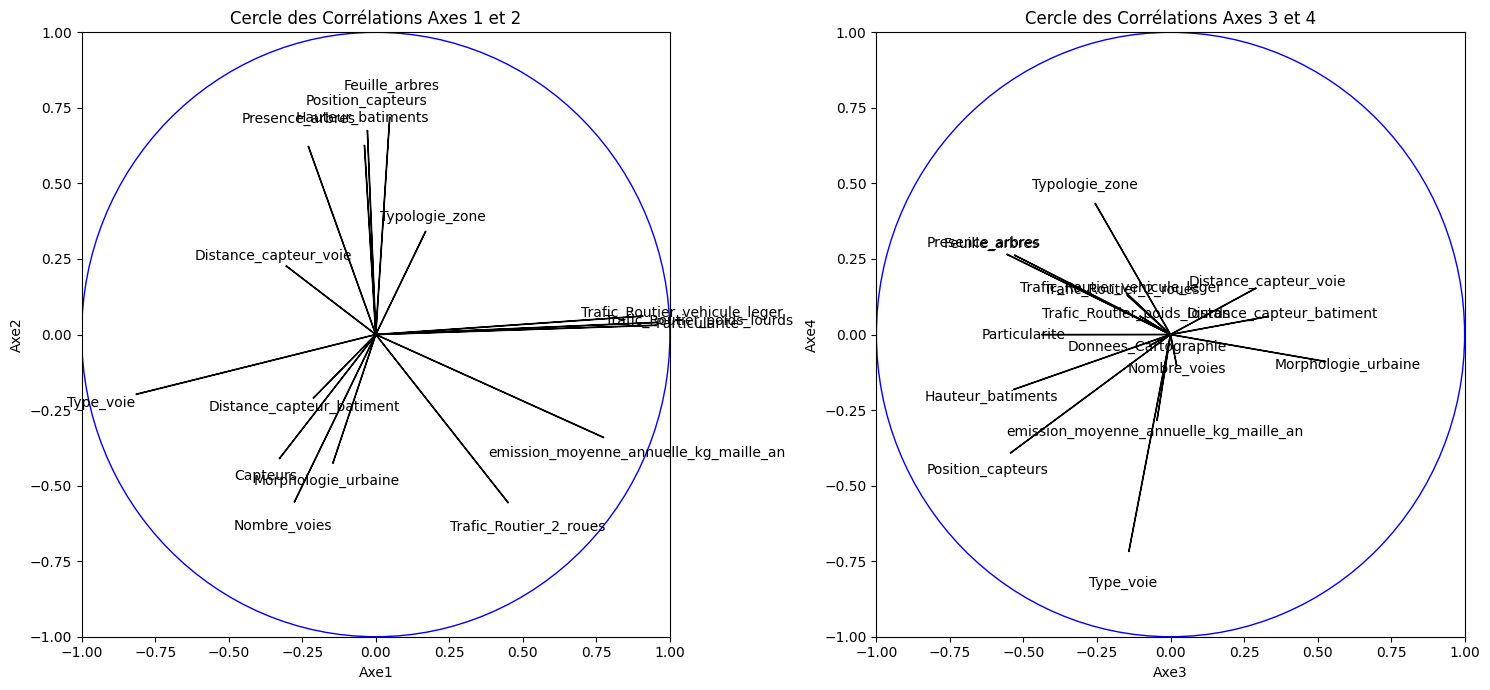

In [27]:
# Créer une figure avec une grille de sous-graphiques (1 ligne, 2 colonnes)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Tracer le cercle de corrélation pour les composantes 1 et 2
axs[0].add_artist(plt.Circle((0, 0), 1, fill=False, color='b'))
for i in range(len(correlations[0])):
    axs[0].arrow(0, 0, correlations[0, i], correlations[1, i], label=colonnes[i])
    axs[0].text(correlations[0, i] * 1.15, correlations[1, i] * 1.15, f"{colonnes[i]}", ha='center', va='center')
axs[0].set_xlabel('Axe1')
axs[0].set_ylabel('Axe2')
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)
axs[0].set_title('Cercle des Corrélations Axes 1 et 2')

# Tracer le cercle de corrélation pour les composantes 3 et 4
axs[1].add_artist(plt.Circle((0, 0), 1, fill=False, color='b'))
for i in range(len(correlations[2])):
    axs[1].arrow(0, 0, correlations[2, i], correlations[3, i], label=colonnes[i+1])
    axs[1].text(correlations[2, i] * 1.15, correlations[3, i] * 1.15, f"{colonnes[i+1]}", ha='center', va='center')
axs[1].set_xlabel('Axe3')
axs[1].set_ylabel('Axe4')
axs[1].set_xlim(-1, 1)
axs[1].set_ylim(-1, 1)
axs[1].set_title('Cercle des Corrélations Axes 3 et 4')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


### Clustering Hierarchique

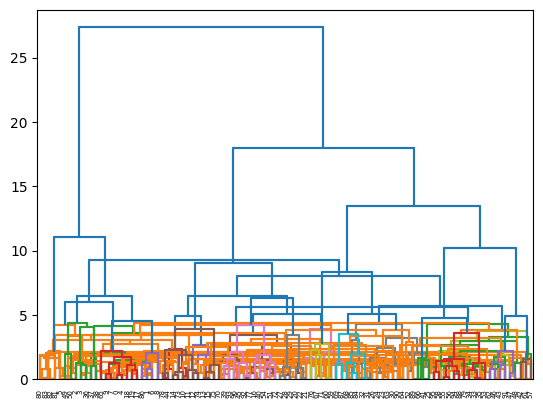

In [28]:
import scipy.cluster.hierarchy as SCH

algorithms = ["single","complete","average","centroid","ward"]


#linkage permet de faire la classification ascendante hierarchique et retourne une matrice de liaision
for algo in algorithms:
    matrice_liaisons = SCH.linkage(Z_acp, method=algo, optimal_ordering=True) 

    dendrogram = SCH.dendrogram(matrice_liaisons, color_threshold=0)
    dendrogram_cut = SCH.dendrogram(matrice_liaisons, color_threshold=4.5)
# le dendrogram représente le lien entre les classes mais aussi la distance entre les classes fusionnbées via la hauteur des branches 
# pour prendre la meilleur distance on regarde la distance entre les liaisons, si elle est trop élévé c'est pas trop utilisable il faut : clusters homogènes et bien sépares

#etant donné que nous avons 6 note possible nous aimerions un nombre de K = 6 clusters mais plutot environ 4-5
#pour avoir 6 cluster il nous couper le dendrogram à t=4.5
# tout est visuel pour le moment 




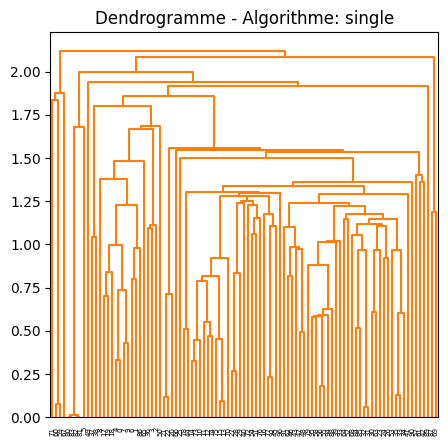

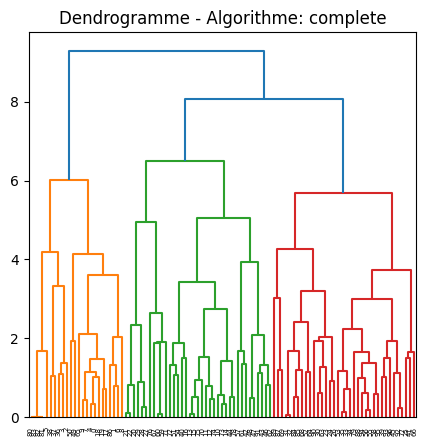

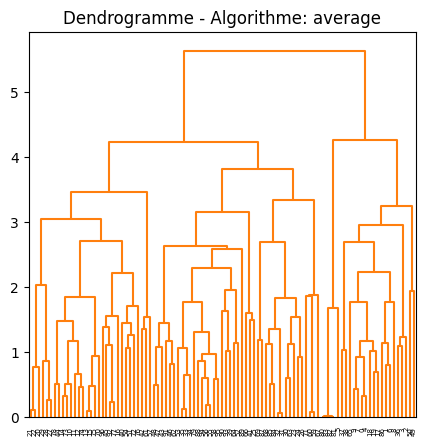

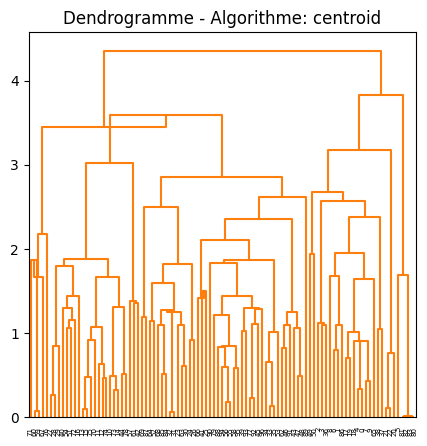

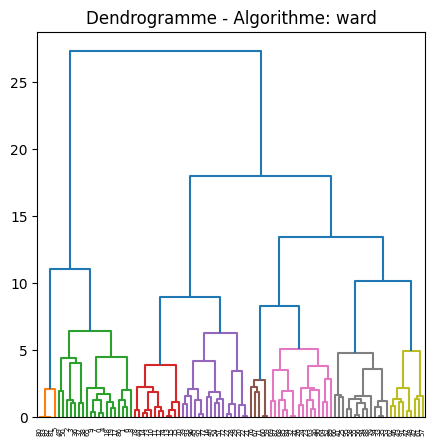

In [29]:
import scipy.cluster.hierarchy as SCH
import matplotlib.pyplot as plt

# Supposons que Z_acp est ta matrice de données pour la CAH

algorithms = ["single", "complete", "average", "centroid", "ward"]
threshold = 8  # Le seuil que tu veux utiliser pour couper le dendrogramme

# Boucle sur les méthodes d'agglomération
for algo in algorithms:
    # Créer une nouvelle figure pour chaque algorithme
    plt.figure(figsize=(5, 5))


    # Effectuer la CAH
    matrice_liaisons = SCH.linkage(Z_acp, method=algo, optimal_ordering=True)

    # Tracer le dendrogramme
    SCH.dendrogram(matrice_liaisons, color_threshold=threshold)

    # Ajouter un titre au dendrogramme
    plt.title(f"Dendrogramme - Algorithme: {algo}")

    # Afficher la figure
    plt.show()


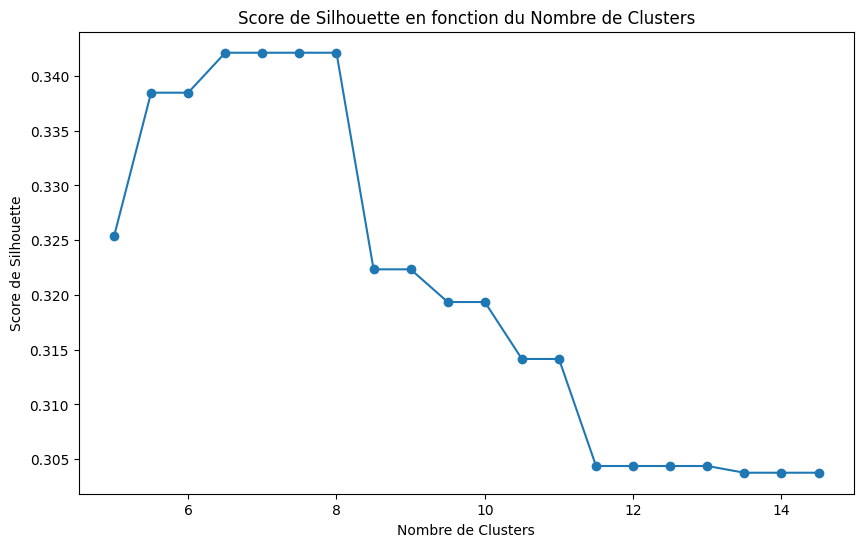

In [51]:

from sklearn.metrics import silhouette_score

matrice_liaisons = SCH.linkage(Z_acp, method="ward", optimal_ordering=True)

# Essayer différents nombres de clusters
nombre_clusters = np.arange(5, 15, 0.5)
scores_silhouette = []

for n in nombre_clusters:
    cluster = SCH.fcluster(matrice_liaisons, n, criterion='distance')
    silhouette_avg = silhouette_score(Z_acp, cluster)
    scores_silhouette.append(silhouette_avg)

# Tracer la courbe de silhouette en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(nombre_clusters, scores_silhouette, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette en fonction du Nombre de Clusters')
plt.show()


In [31]:
#  choix de t = 8 
t=8

cluster = SCH.fcluster(matrice_liaisons, t, criterion='distance')

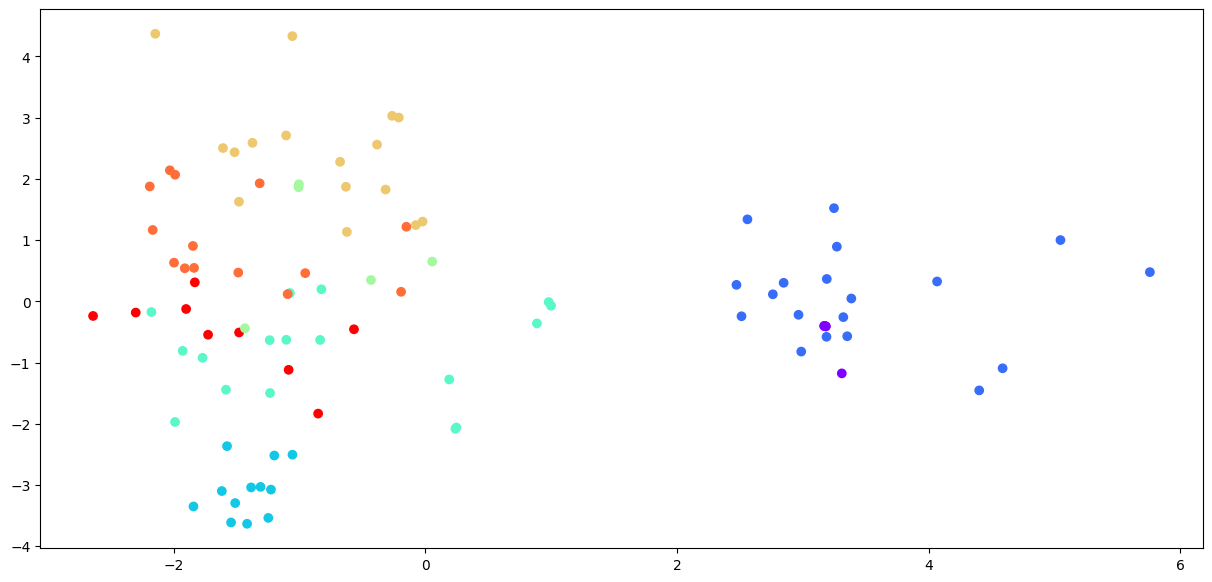

In [32]:
plt.figure(figsize=(15, 7)) 
plt.scatter(Z_acp[:,0], Z_acp[:,1], c=cluster, cmap='rainbow')
plt.show()

In [33]:
# Kmeans 

Inertie de la partition pour différentes valeurs de K :
K=1: Inertie=1028.7737253989933
K=2: Inertie=654.4915634992108
K=3: Inertie=466.2352143458825
K=4: Inertie=364.40001592394617
K=5: Inertie=304.3194011812586
K=6: Inertie=267.84523920612673
K=7: Inertie=236.75958025951576
K=8: Inertie=207.19058666430487
K=9: Inertie=185.2329269966792
K=10: Inertie=180.43680876149978
K=11: Inertie=158.20065964638974
K=12: Inertie=147.4512042490266
K=13: Inertie=140.45261559407697
K=14: Inertie=139.3051211178477
K=15: Inertie=118.93216790169876
K=16: Inertie=117.40605814072549
K=17: Inertie=106.38267995795621
K=18: Inertie=101.29608907130194
K=19: Inertie=100.4185291406073
K=20: Inertie=89.7772698998617
K=21: Inertie=77.16273148670133
K=22: Inertie=82.12868395410477
K=23: Inertie=74.70420377771713
K=24: Inertie=71.98689184581485
K=25: Inertie=69.5463298272201
K=26: Inertie=68.43076983594163
K=27: Inertie=61.619679838276234
K=28: Inertie=61.14259759890372
K=29: Inertie=55.45821943909451
K=30: Inertie=

C:\Users\leand\Desktop\Files\Dev\Categorisation-de-capteurs-de-pollution\venv\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (96) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


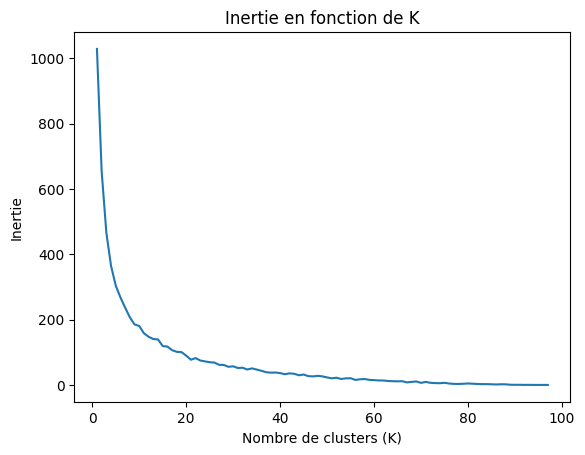

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

for K in range(1, 98):
    kmeans = KMeans(n_clusters=K, init="random", n_init=10)

    # Ajustez le modèle aux données
    kmeans.fit(Z_acp)

    # Obtenez l'inertie de la partition obtenue
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Affichez les résultats
print("Inertie de la partition pour différentes valeurs de K :")
for K, inertia in zip(range(1, 98), inertias):
    print(f"K={K}: Inertie={inertia}")

# Tracez l'inertie en fonction de K
plt.plot(range(1, 98), inertias)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Inertie en fonction de K')
plt.show()

#K=10 2 tangeantes se coupent


# Gaussian Mixture

C:\Users\leand\Desktop\Files\Dev\Categorisation-de-capteurs-de-pollution\venv\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (95) found smaller than n_clusters (96). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\leand\Desktop\Files\Dev\Categorisation-de-capteurs-de-pollution\venv\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (95) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


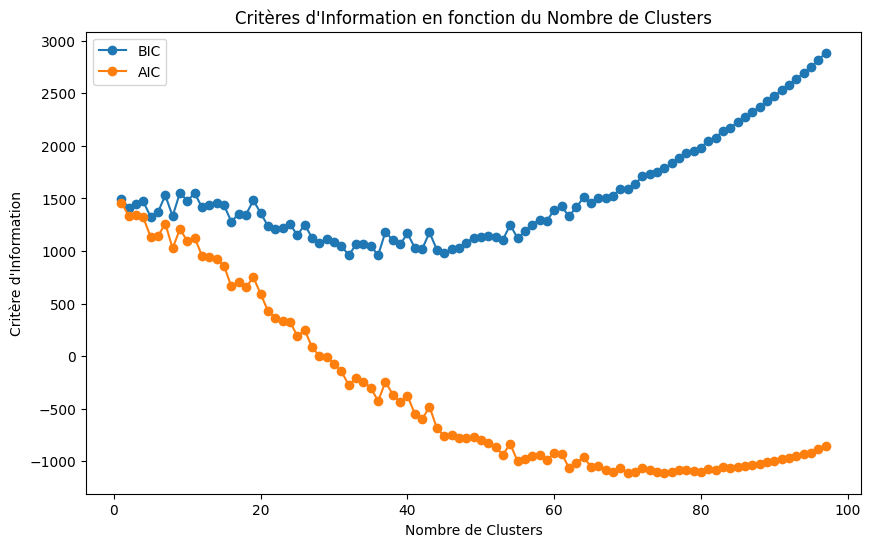

In [78]:
from sklearn.mixture import GaussianMixture

# Essayer différents nombres de clusters
nombre_clusters = range(1, 980)
bics = []
aics = []

for n in nombre_clusters:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(Z_acp)
    
    bics.append(gmm.bic(Z_acp))
    aics.append(gmm.aic(Z_acp))

# Tracer les courbes BIC et AIC en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(nombre_clusters, bics, marker='o', label='BIC')
plt.plot(nombre_clusters, aics, marker='o', label='AIC')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Critère d\'Information')
plt.title('Critères d\'Information en fonction du Nombre de Clusters')
plt.legend()
plt.show()


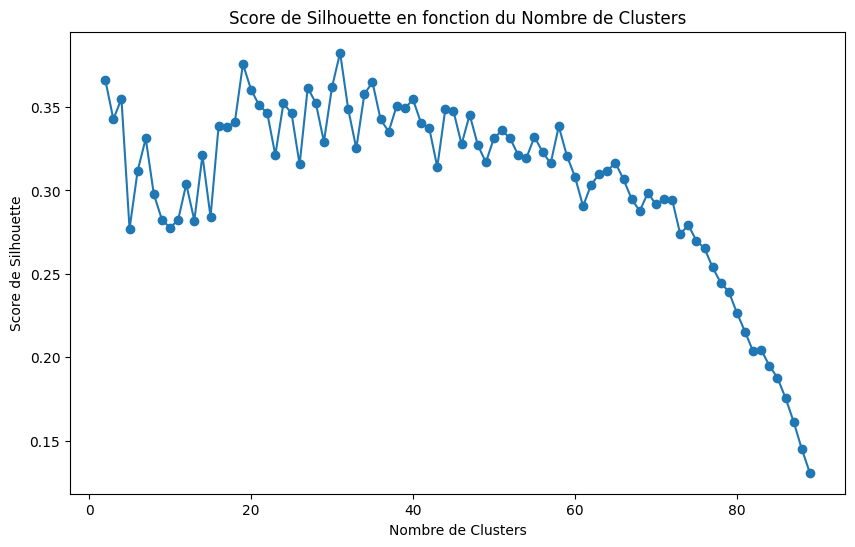

In [80]:
from sklearn.metrics import silhouette_score


# Essayer différents nombres de clusters
nombre_clusters = range(2, 90)
scores_silhouette = []

for n in nombre_clusters:
    gmm = GaussianMixture(n_components=n)
    labels = gmm.fit_predict(Z_acp)
    silhouette_avg = silhouette_score(Z_acp, labels)
    scores_silhouette.append(silhouette_avg)

# Tracer la courbe de silhouette en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(nombre_clusters, scores_silhouette, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette en fonction du Nombre de Clusters')
plt.show()


# SpectralClustering 

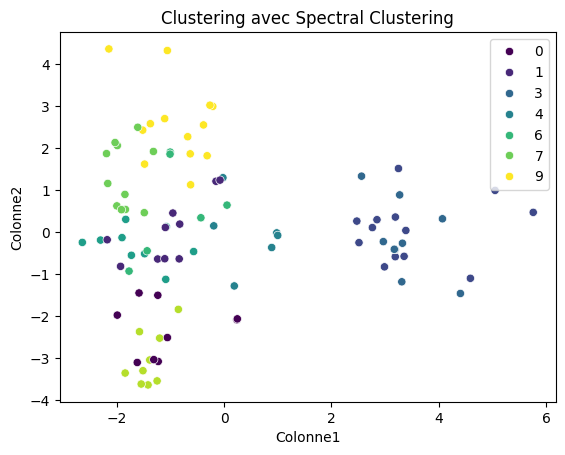

In [75]:
from sklearn.cluster import SpectralClustering

# Créer un modèle de Spectral Clustering
# n_clusters : nombre de clusters à former
spectral_clustering = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=42)

# Ajuster le modèle aux données
labels = spectral_clustering.fit_predict(Z_acp)
df = pd.DataFrame(Z_acp, columns=['Colonne1', 'Colonne2', 'Colonne3', 'Colonne4'])

# Visualiser les résultats
sns.scatterplot(x='Colonne1', y='Colonne2', hue=labels, data=df, palette='viridis')
plt.title('Clustering avec Spectral Clustering')
plt.show()


In [55]:
df

,0,1,2,3
0,2.762517,0.114823,-1.936901,-0.613225
1,3.270909,0.893130,0.063275,0.078768
2,2.966346,-0.219894,0.505906,2.283114
3,3.322305,-0.258093,-0.232774,1.535867
4,2.473132,0.269319,-1.898379,-0.587746
...,...,...,...,...
92,-1.104295,-0.627448,-0.933519,-0.393363
93,-0.825348,0.197440,-0.020869,0.182192
94,-1.910734,0.540273,-1.839622,0.014456
95,-0.953434,0.460684,-1.436908,0.691640


Nombre de clusters : 2, Coefficient de silhouette : 0.38469094368734963
Nombre de clusters : 3, Coefficient de silhouette : 0.362578665811948
Nombre de clusters : 4, Coefficient de silhouette : 0.3397763539964877
Nombre de clusters : 5, Coefficient de silhouette : 0.3196189498205384
Nombre de clusters : 6, Coefficient de silhouette : 0.34769923554933835
Nombre de clusters : 7, Coefficient de silhouette : 0.3287570677045621
Nombre de clusters : 8, Coefficient de silhouette : 0.31357976660094283
Nombre de clusters : 9, Coefficient de silhouette : 0.30708089458805937
Nombre de clusters : 10, Coefficient de silhouette : 0.3144226987448508
Nombre de clusters : 11, Coefficient de silhouette : 0.3305354719113387
Nombre de clusters : 12, Coefficient de silhouette : 0.3297352823421322
Nombre de clusters : 13, Coefficient de silhouette : 0.3277256899214158
Nombre de clusters : 14, Coefficient de silhouette : 0.32947608410933277
Nombre de clusters : 15, Coefficient de silhouette : 0.2903613958466

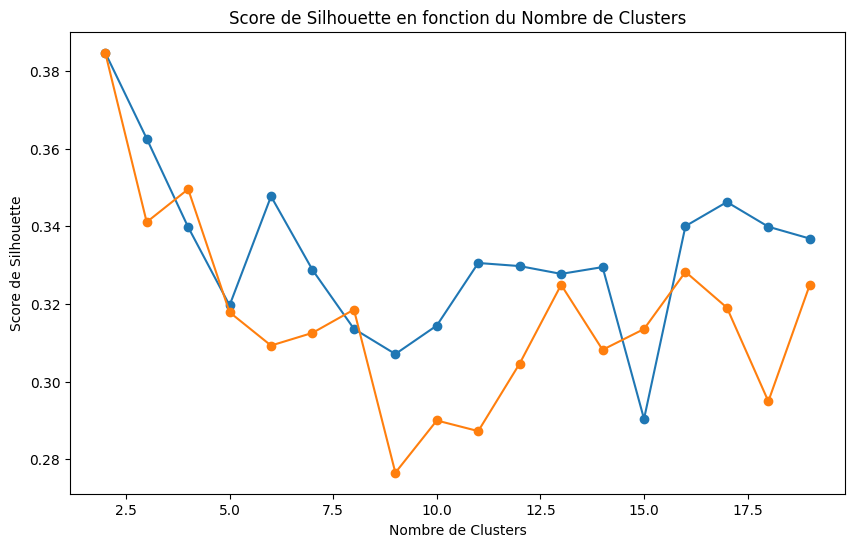

In [72]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score


# Essayer différents nombres de clusters
nombre_clusters = range(1, 20)
affinity = ['rbf','nearest_neighbors']

scores_silhouette_rbf = []
scores_silhouette_nn = []

for aff in affinity:
    for n_clusters in nombre_clusters:
        # Créer le modèle Spectral Clustering avec le nombre de clusters actuel
        modele_spectral = SpectralClustering(n_clusters=n_clusters, affinity=aff , random_state=42) 
        
         # Ajuster le modèle aux données
        labels = modele_spectral.fit_predict(Z_acp)
    
       # Calculer le coefficient de silhouette
        silhouette_coefficient = silhouette_score(Z_acp, labels)
        if aff == 'rbf':
            scores_silhouette_rbf.append(silhouette_coefficient)
        else :
            scores_silhouette_nn.append(silhouette_coefficient)
    
        # Afficher le résultat
        print(f"Nombre de clusters : {n_clusters}, Coefficient de silhouette : {silhouette_coefficient}")

# Tracer la courbe de silhouette en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(nombre_clusters, scores_silhouette_rbf, marker='o', label='BIC')
plt.plot(nombre_clusters, scores_silhouette_nn, marker='o', label='AIC')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette en fonction du Nombre de Clusters')
plt.show()


# DBSCAN

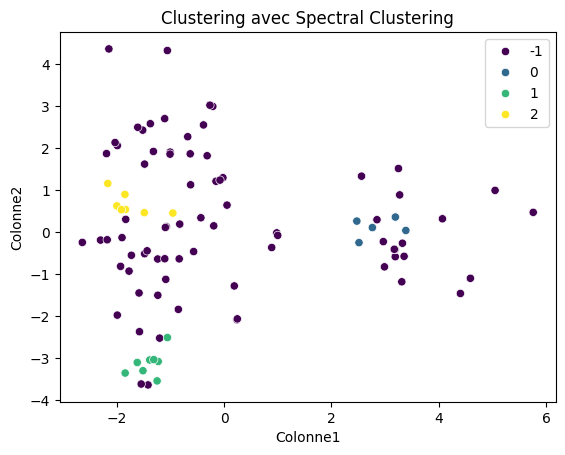

In [85]:
from sklearn.cluster import DBSCAN

# Créer un modèle de Spectral Clustering
# n_clusters : nombre de clusters à former
dbscan = DBSCAN(eps=1, min_samples=5)

# Ajuster le modèle aux données
labels = dbscan.fit_predict(Z_acp)
df = pd.DataFrame(Z_acp, columns=['Colonne1', 'Colonne2', 'Colonne3', 'Colonne4'])

# Visualiser les résultats
sns.scatterplot(x='Colonne1', y='Colonne2', hue=labels, data=df, palette='viridis')
plt.title('Clustering avec Spectral Clustering')
plt.show()

In [87]:
labels

array([ 0, -1, -1, -1,  0, -1, -1,  0, -1,  0,  1,  1,  1,  1, -1,  1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  2,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  2, -1, -1, -1, -1, -1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1,  2,  2, -1], dtype=int64)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score



# Faire varier les paramètres eps et min_samples
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 20]

# Calculer le coefficient de silhouette pour chaque combinaison de paramètres
for eps in eps_values:
    for min_samples in min_samples_values:
        # Créer le modèle DBSCAN avec les paramètres actuels
        modele_dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajuster le modèle aux données
        labels = modele_dbscan.fit_predict(X_standardise)

        # Ignorer les clusters formés uniquement de points considérés comme du bruit (-1)
        if len(set(labels)) > 1:
            # Calculer le coefficient de silhouette
            silhouette_coefficient = silhouette_score(X_standardise, labels)

            # Afficher le résultat
            print(f"eps={eps}, min_samples={min_samples}, Coefficient de silhouette : {silhouette_coefficient}")
